In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


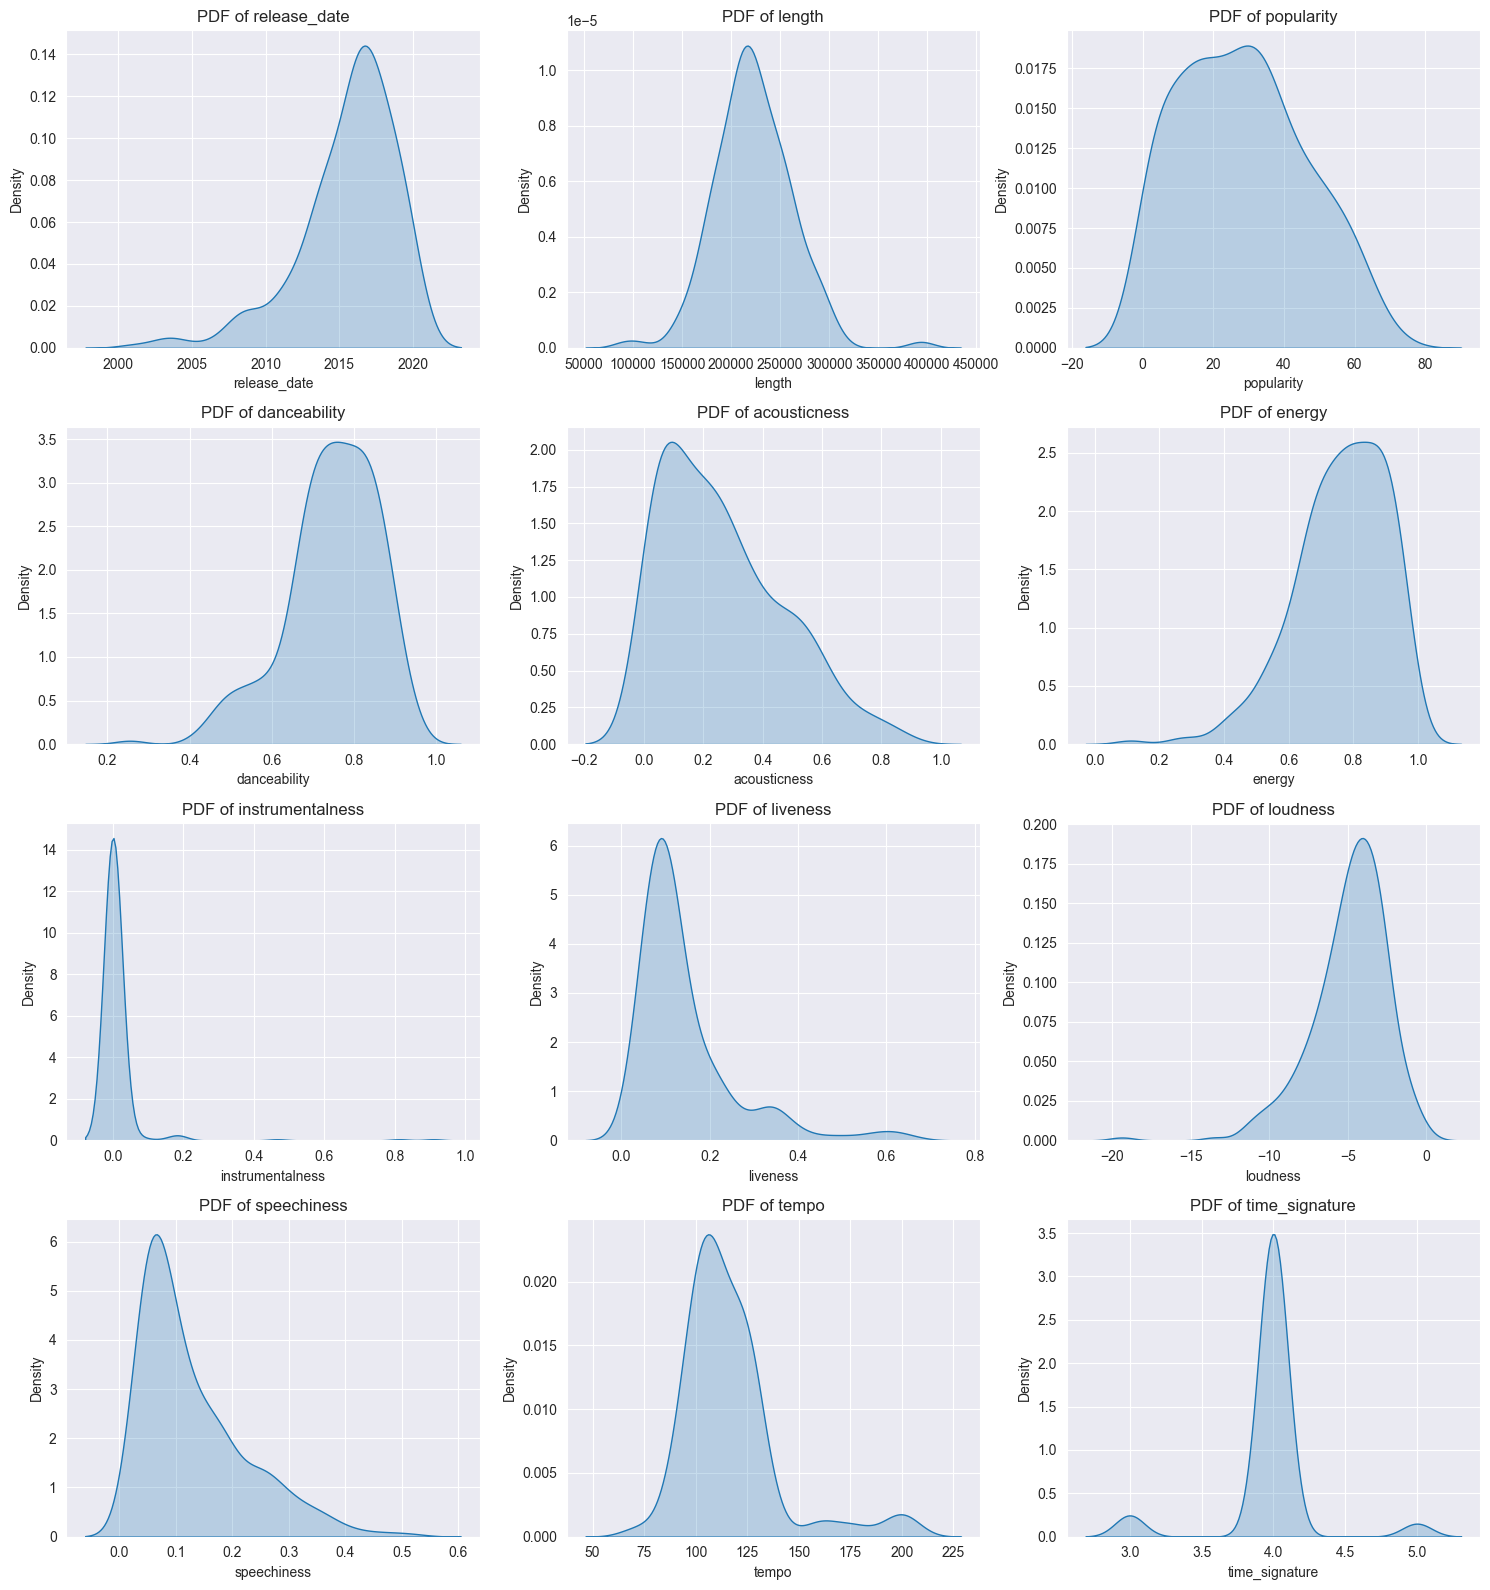

In [24]:
import math

numeric_cols = df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)
# 量的データを取り出す
#　artist_top_genre をラベルとして使いながら同時に特徴量にもしていた理由がいまいち不明なので、教科書のやり方はひとまず置いて、ここでは外すことにした

rows = math.ceil(n_cols / 3) 
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
#　column数に応じてfigsizeを決める

axes = axes.ravel()  
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i])
    axes[i].set_title(f"PDF of {col}")
#　各データの確率密度関数を確認


plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 量的データの標準化を行う

データの数値列は合わせて十二列ある。K=3の元で、どのような列の組み合わせが良いシルエットスコアをもたらすのかを全部計算して大きさ順に並び替え、最上位の十個を取り出す。

In [34]:
import itertools
from sklearn import metrics
from sklearn.cluster import KMeans


X = df[numeric_cols]
y = df['artist_top_genre']

results = []
n_clusters = 3


for r in range(1, len(numeric_cols) + 1):
    for subset in itertools.combinations(numeric_cols, r):
        
        subset = list(subset)  
        X_subset = df[subset]
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_subset)
        score = metrics.silhouette_score(X_subset, labels)
        
        results.append((subset, score))

results.sort(key=lambda x: x[1], reverse=True)

In [35]:
top_10 = results[:10]
for i, (cols, score) in enumerate(top_10, start=1):
    print(f"{i}. {cols} => {score:.4f}")

1. ['time_signature'] => 1.0000
2. ['instrumentalness'] => 0.9691
3. ['instrumentalness', 'time_signature'] => 0.9049
4. ['instrumentalness', 'tempo'] => 0.7578
5. ['tempo', 'time_signature'] => 0.7411
6. ['instrumentalness', 'liveness'] => 0.7313
7. ['liveness', 'time_signature'] => 0.7053
8. ['liveness'] => 0.7011
9. ['danceability', 'time_signature'] => 0.7007
10. ['instrumentalness', 'tempo', 'time_signature'] => 0.6855


シルエットスコアの上WCSSも確認してみる

In [40]:
top_10_features = [x[0] for x in top_10]
n_clusters = 3  

wcss_results = []

for subset in top_10_features:
    X_subset = df[list(subset)]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_subset)
    wcss = kmeans.inertia_
    wcss_results.append((subset, wcss))

for i, (cols, score) in enumerate(wcss_results, start=1):
    print(f"{i}. {cols} => silhouette score:{top_10[i - 1][1]:.4f} WCSS:{score:.4f}")

1. ['time_signature'] => silhouette score:1.0000 WCSS:0.0000
2. ['instrumentalness'] => silhouette score:0.9691 WCSS:28.7061
3. ['instrumentalness', 'time_signature'] => silhouette score:0.9049 WCSS:149.3750
4. ['instrumentalness', 'tempo'] => silhouette score:0.7578 WCSS:136.4512
5. ['tempo', 'time_signature'] => silhouette score:0.7411 WCSS:275.5454
6. ['instrumentalness', 'liveness'] => silhouette score:0.7313 WCSS:132.0571
7. ['liveness', 'time_signature'] => silhouette score:0.7053 WCSS:192.7261
8. ['liveness'] => silhouette score:0.7011 WCSS:41.4820
9. ['danceability', 'time_signature'] => silhouette score:0.7007 WCSS:261.8871
10. ['instrumentalness', 'tempo', 'time_signature'] => silhouette score:0.6855 WCSS:420.6920


In [41]:
df['time_signature'].unique()

array([-3.07262014,  0.07709083,  3.2268018 ])

In [43]:
df['instrumentalness'].unique()

array([-1.56658941e-01, -1.56435187e-01,  1.11532319e+01, -1.58676578e-01,
       -1.02945627e-01, -1.58163063e-01,  5.64640521e+00, -1.21343152e-01,
       -1.55900665e-01, -1.55826080e-01, -1.58759739e-01, -1.15376387e-01,
       -1.58006435e-01, -1.48081717e-01, -1.43967135e-01, -1.58453943e-01,
       -1.57317771e-01, -1.55216973e-01, -1.58722571e-01, -1.58728662e-01,
       -1.58283641e-01, -1.58115826e-01, -1.57081587e-01, -2.07783027e-02,
       -1.57454510e-01, -1.48044424e-01,  2.24107670e-01, -1.58601869e-01,
       -1.58741839e-01, -1.55080234e-01, -1.58349524e-01, -1.58713373e-01,
       -1.58700072e-01, -1.58736742e-01, -1.58672973e-01, -1.53973897e-01,
       -1.58591924e-01, -1.58384330e-01,  1.01221786e+00, -1.20597306e-01,
       -1.37378832e-01, -1.58389303e-01, -1.56373033e-01, -8.71585615e-02,
        2.00489226e-01, -1.58660666e-01, -1.52879990e-01, -1.58529770e-01,
       -1.58738234e-01, -1.58056158e-01, -1.58733386e-01, -1.58714243e-01,
       -1.57536553e-01, -

In [50]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("nigerian-songs.csv")
scaler = MinMaxScaler()
df['instrumentalness'] = scaler.fit_transform(pd.DataFrame(df['instrumentalness']))
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pd.DataFrame(df['instrumentalness']))
score = metrics.silhouette_score(pd.DataFrame(df['instrumentalness']), labels)

In [51]:
score

0.9698445365118964

結論：
time_signatureを特徴量に含めるとシルエットスコアが1となり、最も高い値を示す。しかし、ユニークな値が3つしか存在しないことを考慮すると、これはある意味で必然的な結果と考えられる。そこで、StandardScalerによる標準化とk=3という条件下で検討したところ、最も高いシルエットスコアを示した特徴量はinstrumentalnessだった。

一方、事前に作成した分布図を確認すると、この特徴量は正規分布に従わず左側へ偏り、外れ値も多く含まれていることが確認できる。そこで、StandardScalerに加えてMinMaxScalerによる標準化も試したが、シルエットスコアに大きな差はない。さらに、WCSSもきわめて低い値であったことから、クラスター間の分離とクラスター内部の結束という両面において優れた結果が得られており、本モデルは良好な性能を示していると考えられる。